In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import emoji 
from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob
import seaborn as sns
from collections import Counter
from plotly.offline import iplot  
import plotly.graph_objs as go

In [3]:
df = pd.read_csv(r"C:\Users\yagne\Documents\OneDrive4\Documents\Coding Languages\Artificial Intelegence\Data Analysis\Excel_and_CSV\amazon_alexa.csv",on_bad_lines='skip')

In [4]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [5]:
df.shape

(3150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [9]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [10]:
TextBlob('Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.').sentiment.polarity

-0.1

In [11]:
TextBlob('I sent it to my 85 year old Dad, and he talks to it constantly.').sentiment.polarity

0.05

In [12]:
df2 = df[0:1000]

In [13]:
df.shape,df2.shape

((3149, 5), (1000, 5))

In [14]:
polarity = []
for i in df['verified_reviews']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [15]:
polarity

[0.625,
 0.875,
 -0.1,
 0.35,
 0.0,
 0.29464285714285715,
 0.21666666666666667,
 0.2,
 0.8,
 0.98828125,
 0.05,
 0.4036458333333333,
 0.00416666666666667,
 0.59375,
 -0.1,
 0.5,
 0.6777777777777777,
 0.12136363636363637,
 0.178125,
 0.15722222222222224,
 0.2296875,
 0.2722727272727273,
 0.20357142857142857,
 0.5,
 0.05,
 0.6000000000000001,
 0.4,
 0.8125,
 0.16944444444444443,
 -0.125,
 0.30999999999999994,
 0.0,
 0.3666666666666667,
 0.2425925925925926,
 1.0,
 0.25,
 0.6,
 0.5,
 0.39375,
 0.3402597402597402,
 0.5,
 0.25,
 0.39999999999999997,
 0.21428571428571427,
 0.8,
 0.65,
 0.45,
 0.4,
 0.35,
 0.0,
 0.0,
 0.5,
 0.55,
 0.37,
 0.5,
 0.5,
 0.5633333333333334,
 0.5444444444444445,
 0.5,
 0.6,
 0.0,
 0.45833333333333337,
 0.0,
 0.5,
 0.43,
 0.43333333333333335,
 0.3071428571428571,
 0.0,
 0.2,
 0.6625,
 0.37,
 0.8,
 0.5,
 0.0,
 0.0,
 1.0,
 0.27045454545454545,
 0.7999999999999999,
 0.0,
 0.5,
 0.17012310606060607,
 0.0,
 1.0,
 0.35,
 0.6510416666666667,
 0.0,
 0.09999999999999999,
 0.4

In [16]:
len(polarity)

3149

In [17]:
df['polarity'] = polarity

In [18]:
df['polarity'].head()

0    0.625
1    0.875
2   -0.100
3    0.350
4    0.000
Name: polarity, dtype: float64

In [19]:
filter = df['polarity']==1

In [20]:
POSITIVE = df[filter]

In [21]:
filter = df['polarity'] == -1
NEGATIVE = df[filter]

In [22]:
NEGATIVE

,rating,date,variation,verified_reviews,feedback,polarity
661,1,24-May-18,Black,This Echo Dot is horrible. The volume on my ph...,0,-1.0
1340,1,19-Jul-18,Black Spot,Get rid of the &#34;Thongs To Try&#34; screen!...,0,-1.0
1386,1,17-Jul-18,Black Spot,Invasive and scared the crap out of me for spe...,0,-1.0
1903,1,27-Jul-18,White Plus,Terrible. Stopped working after one day.,0,-1.0


In [23]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [24]:
type(df['verified_reviews'])

pandas.core.series.Series

In [25]:
Cloud = " ".join(df['verified_reviews'])

In [26]:
Cloud

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

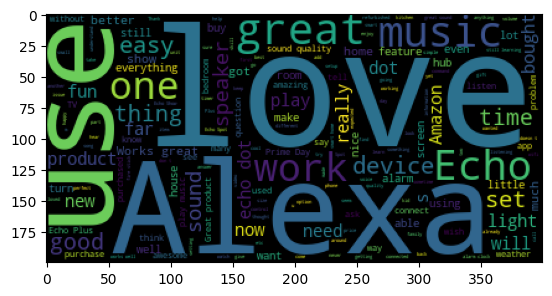

In [27]:
words = WordCloud(stopwords = set(STOPWORDS)).generate(Cloud)
mp.imshow(words)

In [28]:
emoji

<module 'emoji' from 'g:\\Programming Languages\\Python\\Lib\\site-packages\\emoji\\__init__.py'>

In [34]:
emoji_list = []
for i in df['verified_reviews']:
    for j in i:
        if j in emoji.EMOJI_DATA:
            emoji_list.append(j)
emoji_list

['👍',
 '🏻',
 '😍',
 '🤓',
 '😁',
 '😁',
 '😁',
 '😁',
 '😂',
 '👍',
 '🏾',
 '😬',
 '‼',
 '👍',
 '🏻',
 '😍',
 '🤓',
 '😁',
 '😁',
 '😁',
 '😁',
 '😍',
 '💋',
 '💋',
 '💋',
 '💋',
 '❤',
 '😉',
 '😊',
 '⏰',
 '🎶',
 '😔',
 '😑',
 '😎',
 '👍',
 '🏻',
 '😳',
 '❤',
 '❤',
 '⭐',
 '⭐',
 '⭐',
 '⭐',
 '⭐',
 '❤',
 '😥',
 '😏',
 '👍',
 '👍',
 '😄',
 '😄',
 '😂',
 '😂']

In [45]:
EMOJIS = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [46]:
counter = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [41]:
EMOJIS

['😁', '👍', '⭐', '💋', '❤', '🏻', '😍', '😂', '🤓', '😄']

In [47]:
trace = go.Bar(x = EMOJIS,y = counter)

In [48]:
trace

Bar({
    'x': ['😁', '👍', '⭐', '💋', '❤', '🏻', '😍', '😂', '🤓', '😄'], 'y': [8, 6, 5, 4, 4, 3, 3, 3, 2, 2]
})

In [49]:
iplot([trace])